<a href="https://colab.research.google.com/github/RAV10K1/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/LS_DS_111_Exploratory_Data_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

# Importing libraries
import pandas as pd

# Loading data from UCI
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx'


In [0]:
# Loading in Pandas Data Frame
df = pd.read_excel(data_url)

In [0]:
# Are the headers showing up properly? No
df.head()

,Unnamed: 0,TL BASED,USD BASED,imkb_x,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,date,ISE,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
1,2009-01-05 00:00:00,0.0357537,0.0383762,-0.00467931,0.00219342,0.00389438,0,0.0311902,0.012698,0.0285245
2,2009-01-06 00:00:00,0.0254259,0.0318127,0.00778674,0.00845534,0.0128656,0.00416245,0.0189196,0.0113407,0.00877264
3,2009-01-07 00:00:00,-0.0288617,-0.026353,-0.0304691,-0.0178331,-0.0287346,0.0172929,-0.0358986,-0.0170728,-0.0200154
4,2009-01-08 00:00:00,-0.0622081,-0.0847159,0.00339136,-0.0117263,-0.000465999,-0.0400613,0.0282832,-0.00556096,-0.0194238


In [0]:
# Cleaning the data structure
column_headers = ['DATE', 'ISE TL BASED', 'ISE USD BASED', 'SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'MSCE_EU', 'MSCE_EM']
df = pd.read_excel(data_url, header=None, names=column_headers)
df = df.drop(df.index[[0,1]])

In [0]:
# Checking the Data Frame head and tail - Data in order
print(df.head())
print(df.tail())

                  DATE ISE TL BASED  ...     MSCE_EU     MSCE_EM
2  2009-01-05 00:00:00    0.0357537  ...    0.012698   0.0285245
3  2009-01-06 00:00:00    0.0254259  ...   0.0113407  0.00877264
4  2009-01-07 00:00:00   -0.0288617  ...  -0.0170728  -0.0200154
5  2009-01-08 00:00:00   -0.0622081  ... -0.00556096  -0.0194238
6  2009-01-09 00:00:00   0.00985991  ...  -0.0109886 -0.00780221

[5 rows x 10 columns]
                    DATE ISE TL BASED  ...      MSCE_EU      MSCE_EM
533  2011-02-16 00:00:00   0.00859906  ...   0.00697461   0.00303899
534  2011-02-17 00:00:00   0.00931031  ... -0.000580515   0.00103859
535  2011-02-18 00:00:00  0.000190969  ...  0.000571574   0.00693787
536  2011-02-21 00:00:00    -0.013069  ...   -0.0126153 -0.000957736
537  2011-02-22 00:00:00  -0.00724632  ...  -0.00546489   -0.0142969

[5 rows x 10 columns]


In [0]:
# Checking data frame shape - Corresponds to UCI site.
df.shape

(536, 10)

In [0]:
# Checking for missing values
df.isnull().sum()

DATE             0
ISE TL BASED     0
ISE USD BASED    0
SP               0
DAX              0
FTSE             0
NIKKEI           0
BOVESPA          0
MSCE_EU          0
MSCE_EM          0
dtype: int64

In [0]:
# Importing Numpy library
import numpy as np

In [0]:
# Summary Statistics of the Data
df.describe()

,DATE,ISE TL BASED,ISE USD BASED,SP,DAX,FTSE,NIKKEI,BOVESPA,MSCE_EU,MSCE_EM
count,536,536.000000,536.000000,536.0,536.0,536.0,536.0,536.0,536.0,536.000000
unique,536,536.000000,536.000000,519.0,527.0,523.0,503.0,508.0,532.0,536.000000
top,2010-03-29 00:00:00,0.014338,-0.002398,0.0,0.0,0.0,0.0,0.0,0.0,-0.014725
freq,1,1.000000,1.000000,18.0,10.0,14.0,34.0,29.0,5.0,1.000000


## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


In [34]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

# Importing libraries and data set from local PC
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Wholesale customers data.csv to Wholesale customers data (1).csv


In [0]:
# Loading data into a data frame
df = pd.read_csv('Wholesale customers data.csv')

In [36]:
# Checking Head/Tail of data frame
print(df.head())
print(df.tail())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
     Channel  Region  Fresh  ...  Frozen  Detergents_Paper  Delicassen
435        1       3  29703  ...   13135               182        2204
436        1       3  39228  ...    4510                93        2346
437        2       3  14531  ...     437             14841        1867
438        1       3  10290  ...    1038               168        2125
439        1       3   2787  ...      65               477          52

[5 rows x 8 columns]


In [37]:
# Checking if shape is consistent with data according to UCI (Yes)
df.shape

(440, 8)

In [38]:
# Checking for Null values
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [39]:
# Summary Statistics
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [0]:
# Your Code Here

# Using the Data Set of Wholesale customers from previous question.

# First replacing region numbers with names

df['Region'].replace({1:'Lisbon',2:'Opporto',3: 'Other Regions'},inplace=True)

# Replacing channel numbers with names

df['Channel'].replace({1:'Horeca',2:'Retail',},inplace=True)

In [45]:
# Checking Head/Tail of Data Frame
print(df.head())
print(df.tail())

  Channel         Region  Fresh  ...  Frozen  Detergents_Paper  Delicassen
0  Retail  Other Regions  12669  ...     214              2674        1338
1  Retail  Other Regions   7057  ...    1762              3293        1776
2  Retail  Other Regions   6353  ...    2405              3516        7844
3  Horeca  Other Regions  13265  ...    6404               507        1788
4  Retail  Other Regions  22615  ...    3915              1777        5185

[5 rows x 8 columns]
    Channel         Region  Fresh  ...  Frozen  Detergents_Paper  Delicassen
435  Horeca  Other Regions  29703  ...   13135               182        2204
436  Horeca  Other Regions  39228  ...    4510                93        2346
437  Retail  Other Regions  14531  ...     437             14841        1867
438  Horeca  Other Regions  10290  ...    1038               168        2125
439  Horeca  Other Regions   2787  ...      65               477          52

[5 rows x 8 columns]


In [48]:
# Crosstab data exploration
pd.crosstab(df['Region'], df['Channel'])


Channel,Horeca,Retail
Region,,
Lisbon,59,18
Opporto,28,19
Other Regions,211,105


## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

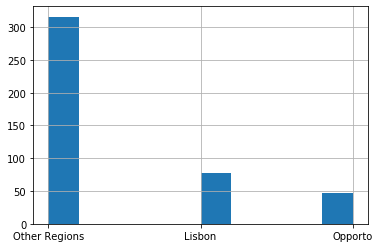

In [55]:
# Your Code Here

# Histograms

df['Region'].hist();

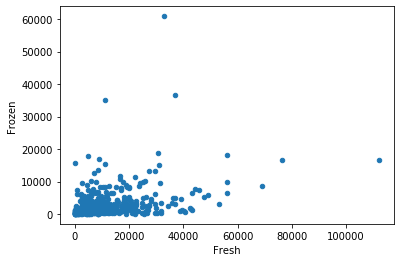

In [57]:
# Scatterplot

df.plot.scatter('Fresh','Frozen');

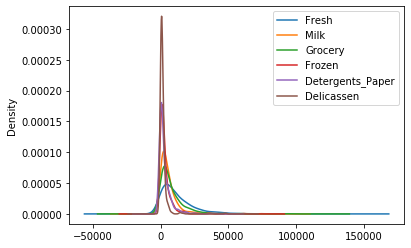

In [59]:
# Density Plot

df.plot.density();

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


In [0]:
# Your Code Here

# Assigning variable to crosstab data
results = pd.crosstab(df['Region'], df['Channel'])

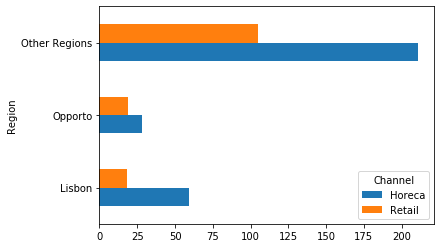

In [70]:
results.plot.barh();

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

# **Stretch Goal 1 - Explore Other Datasets**

In [0]:
# Importing Seaborn library
import seaborn as sns

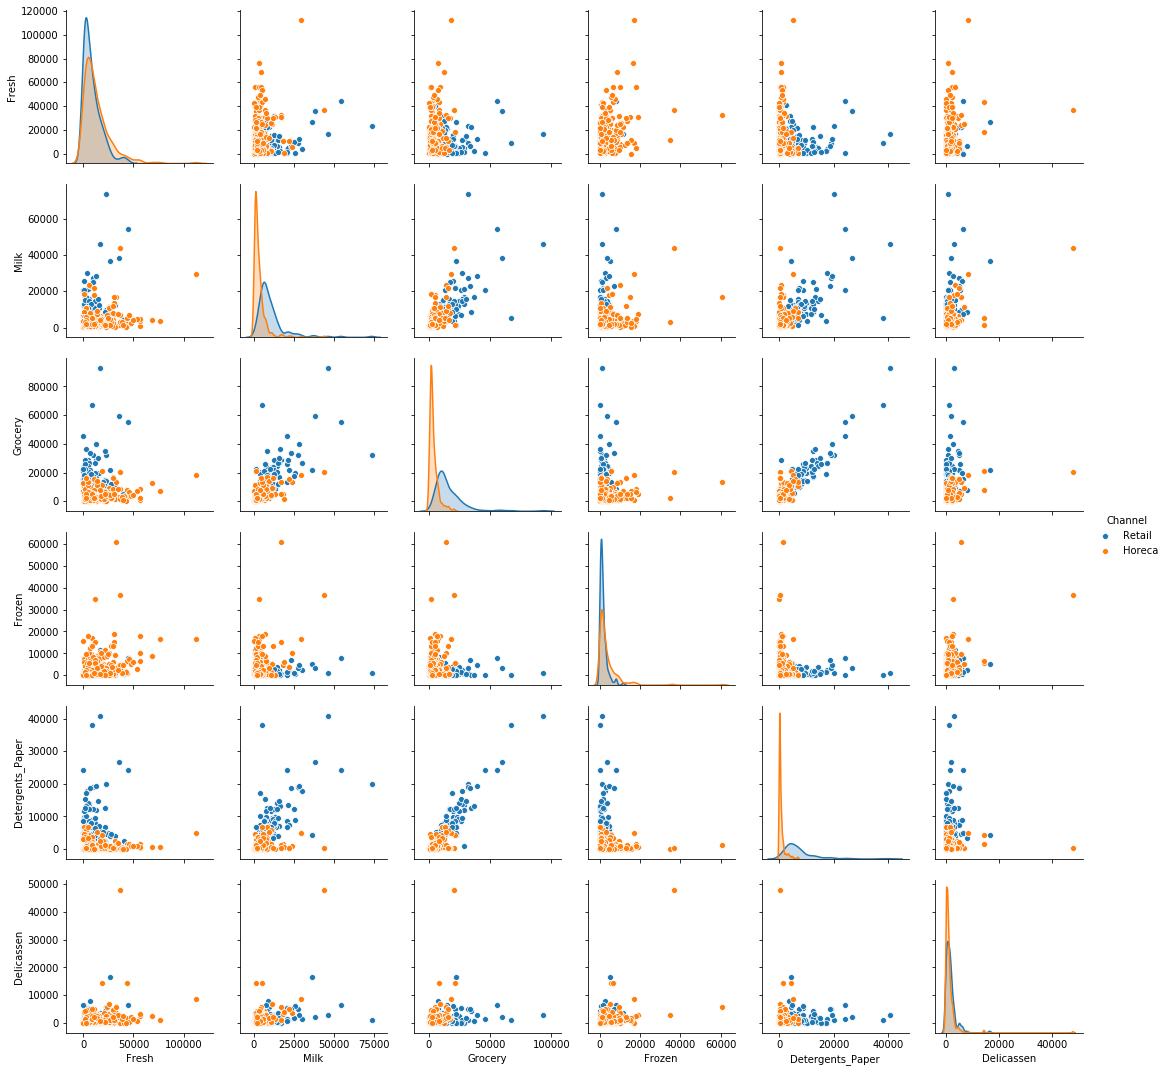

In [74]:
# Applying pairplot to Wholesale Customer dataframe
sns.pairplot(df,hue='Channel');

In [120]:
# Importing new data set (Bank Marketing Data)
uploaded = files.upload()

Saving bank.csv to bank.csv


In [122]:
# Loading data into dataframe
df1 = pd.read_csv('bank.csv',sep=';')
print(df1.head())
print(df1.shape)

   age          job  marital  education  ... pdays  previous poutcome   y
0   30   unemployed  married    primary  ...    -1         0  unknown  no
1   33     services  married  secondary  ...   339         4  failure  no
2   35   management   single   tertiary  ...   330         1  failure  no
3   30   management  married   tertiary  ...    -1         0  unknown  no
4   59  blue-collar  married  secondary  ...    -1         0  unknown  no

[5 rows x 17 columns]
(4521, 17)


In [123]:
# Checking data for null values
df1.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [124]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [125]:
# Checking data types
df1.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

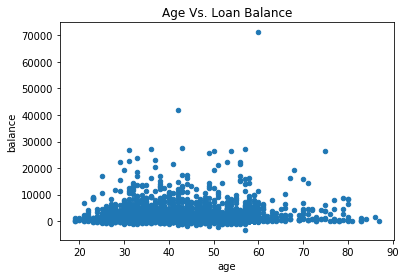

In [142]:
# Some Visualizations
df1.plot.scatter('age', 'balance', title='Age Vs. Loan Balance');


In [0]:
# Crosstabs
myresults = pd.crosstab(df1['job'], df1['education'])

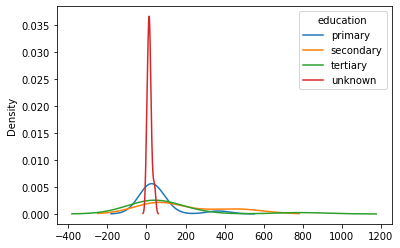

In [146]:
myresults.plot.density();

In [0]:
# Binning continuous variables
bal_range = pd.cut(df1['balance'], bins=10)
age_range = pd.qcut(df1['age'],10)

In [164]:
# Crosstabbing binned variables
pd.crosstab(age_range,bal_range)

balance,"(-3387.501, 4137.1]","(4137.1, 11587.2]","(11587.2, 19037.3]","(19037.3, 26487.4]","(26487.4, 33937.5]","(41387.6, 48837.7]","(63737.9, 71188.0]"
age,,,,,,,
"(18.999, 29.0]",453,26,2,1,0,0,0
"(29.0, 32.0]",531,34,5,2,1,0,0
"(32.0, 34.0]",378,33,5,1,0,0,0
"(34.0, 36.0]",343,22,2,0,1,0,0
"(36.0, 39.0]",406,35,7,2,0,0,0
"(39.0, 43.0]",476,48,6,1,1,1,0
"(43.0, 47.0]",406,33,5,0,0,0,0
"(47.0, 51.0]",378,32,4,4,0,0,0
"(51.0, 56.0]",380,27,4,4,0,0,0


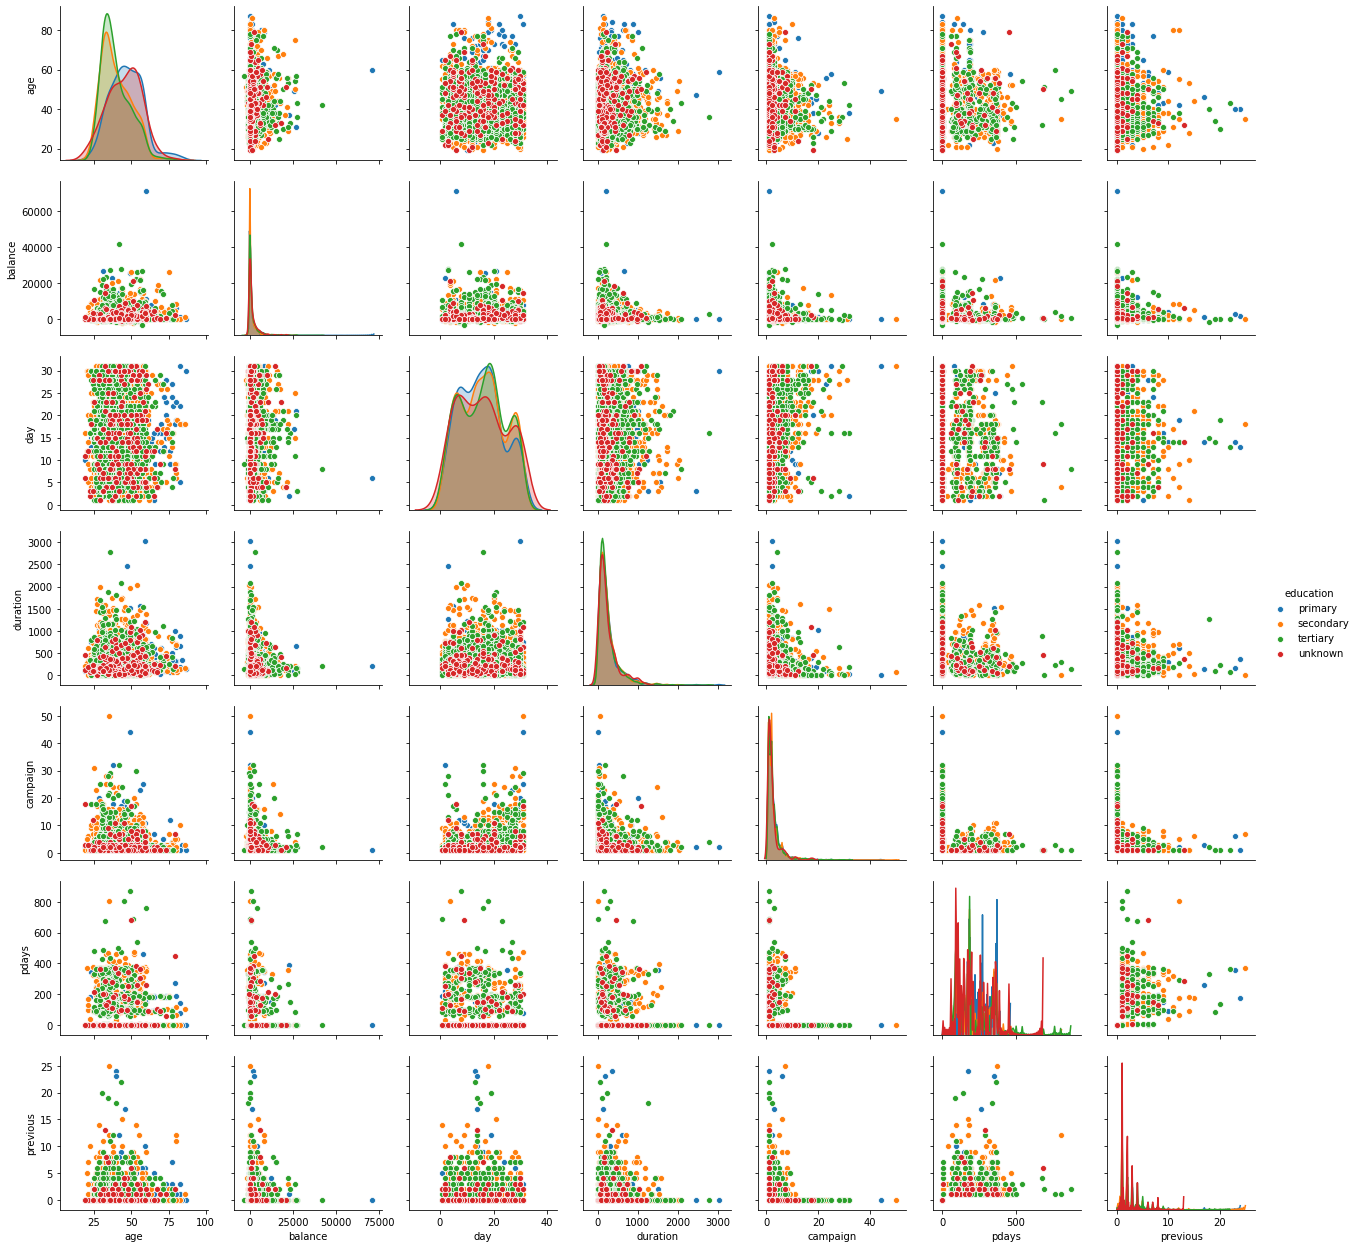

In [163]:
# Visualizing variables
sns.pairplot(df1,hue='education');

# **Stretch Goal 2 - APIs**

In [0]:
# Installing required libraries
pip install requests

In [0]:
import requests
import json

In [0]:
# Installing Alpha Vantage API to perform GET request for stock data on Google. (Alphabet Inc.)
pip install alpha_vantage

In [0]:
# Installing matplotlib
pip install matplotlib

In [0]:
# Installing required libraries
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [0]:
key = 'YQQ7Z2NRWXK00325'
ts = TimeSeries(key, output_format='pandas')
ti = TechIndicators(key)

In [0]:
# Obtaining stock data on Google
googl_data, googl_meta_data = ts.get_daily(symbol='GOOGL')
googl_sma, googl_meta_sma = ti.get_sma(symbol='GOOGL')

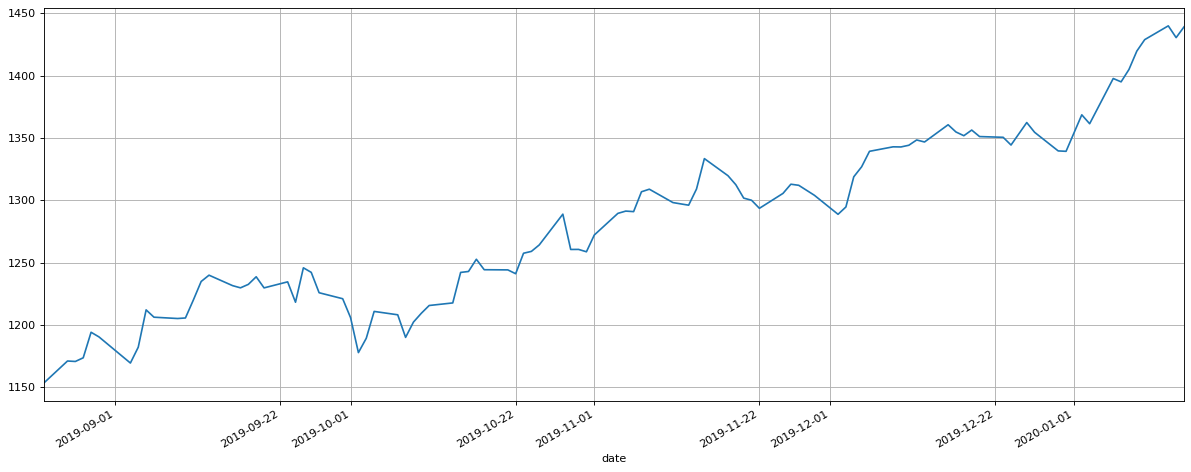

In [180]:
# Visualizing data
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
googl_data['4. close'].plot()
plt.tight_layout()
plt.grid()
plt.show()